# Data préprocessing (prétraitement des données)

## <u>Introduction</u>
Le data preprocessing est une étape cruciale dans tout projet d'analyse de données. Elle consiste à préparer les données pour l'analyse ultérieure en nettoyant les données, en les transformant et en les sélectionnant.

Dans cet article, nous allons utiliser une base de données d'authentification des billets de banque pour illustrer les différentes étapes du data preprocessing en utilisant Python et Jupyter Notebook. Nous allons utiliser des formules et des codes pour expliquer chaque étape.

### Collecte des données
<p>
Dans cet exemple, nous avons téléchargé la base de données d'authentification des billets de banque du référentiel <a href="https://archive.ics.uci.edu/">UCI ML</a>.

Le lien de téléchargement de la base de données est : https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
</p>
<p>Après avoir téléchargé la base de données, nous lisons le fichier csv en utilisant la bibliothèque pandas :</p>

## Etape 1 : Importation des bibliothèques

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set()

## Etape 2 : Chargement des données
Nous allons charger les données en utilisant la fonction read_csv de pandas.

In [3]:
# Chargement des données depuis le fichier csv
df = pd.read_csv("BankNote_Authentication.csv")

## Etape 3 : Exploration des données
Nous allons explorer les données pour comprendre leur structure et leurs caractéristiques.

In [4]:
# Affichage des 5 premières lignes
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
# Affichage des informations sur les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
# Affichage des statistiques descriptives
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# Affichage des valeurs uniques d'une colonne
df["class"].unique()

array([0, 1], dtype=int64)

In [8]:
# Affichage des valeurs manquantes par colonne
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

## Etape 4 : Nettoyage des données
Après avoir exploré les données, nous allons nettoyer les données en supprimant les valeurs manquantes, les doublons et les colonnes inutiles.

In [9]:
# Suppression des doublons
df.drop_duplicates(inplace=True)

# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Réinitialisation de l'index
df.reset_index(drop=True, inplace=True)

## Etape 5 : Transformation des données

Après le nettoyage des données, nous allons transformer les données pour qu'elles soient exploitables. Nous allons créer de nouvelles colonnes à partir des colonnes existantes et convertir les données en formats exploitables.

In [10]:
# Conversion de la colonne "class" en format numérique
df["class"] = pd.to_numeric(df["class"])

# Normalisation des données
scaler = StandardScaler()
df[["Variance", "entropy"]] = scaler.fit_transform(df[["variance", "entropy"]])

## Etape 6 : Visualisation des données

La visualisation des données est une étape importante pour comprendre la distribution des données et les relations.

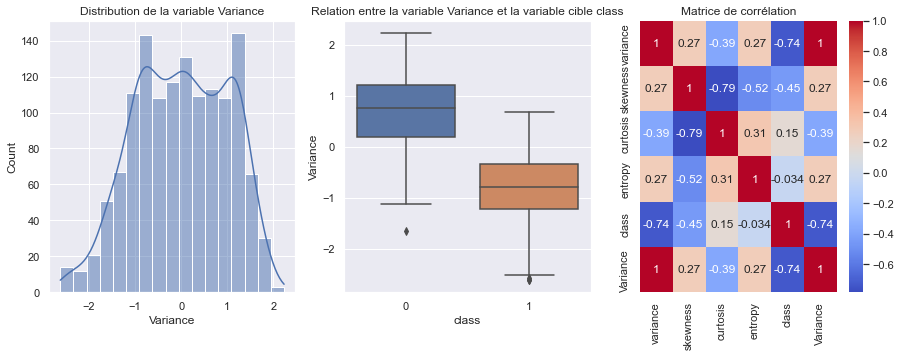

In [11]:
# Créer la grille de sous-figures
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Distribution de la variable "Variance"
sns.histplot(df["Variance"], kde=True, ax=axes[0])
axes[0].set_title('Distribution de la variable Variance')

# Relation entre la variable "Variance" et la variable cible "class"
sns.boxplot(x=df["class"], y=df["Variance"], ax=axes[1])
axes[1].set_title('Relation entre la variable Variance et la variable cible class')

# Matrice de corrélation
sns.heatmap(df.corr(), annot=True, cmap="coolwarm" , ax=axes[2])
axes[2].set_title('Matrice de corrélation')

# Affichage du graphique
plt.show()

## <u>Conclusion</u>
Dans ce notebook, nous avons abordé les différentes étapes de prétraitement des données pour l'analyse. Nous avons importé les bibliothèques nécessaires, chargé les données, exploré les données, nettoyé les données, transformé les données et visualisé les données.

Le Data Preprocessing est une étape importante dans l'analyse de données car elle permet de préparer les données pour l'analyse en éliminant les erreurs, les données inutiles et en transformant les données en formats exploitables. Cette étape est cruciale pour obtenir des résultats fiables et précis lors de l'analyse de données.

Il est important de comprendre que le prétraitement des données est un processus itératif qui peut nécessiter plusieurs ajustements en fonction des résultats obtenus lors de l'analyse des données.

Le lien de téléchargement de la base de données utilisée dans ce notebook est : https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data.

Il est important de noter que ce notebook n'est qu'un exemple et que le Data Preprocessing peut varier en fonction des données et des objectifs de l'analyse. Il est recommandé de personnaliser le processus de prétraitement des données en fonction de chaque situation.

#### Emmanuel Evilafo
github : https://github.com/Evilafo
Site web : http://research.evilafo.com/